# Advance house price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read dataset
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 81)

# Missing values

In [5]:
nan_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
print("total number of null features=",len(nan_feature))
for feature in nan_feature:
    print(feature,'=',np.round(dataset[feature].isnull().mean(),4)," % missing values")

total number of null features= 18
LotFrontage = 0.1774  % missing values
Alley = 0.9377  % missing values
MasVnrType = 0.0055  % missing values
MasVnrArea = 0.0055  % missing values
BsmtQual = 0.0253  % missing values
BsmtCond = 0.0253  % missing values
BsmtExposure = 0.026  % missing values
BsmtFinType1 = 0.0253  % missing values
BsmtFinType2 = 0.026  % missing values
FireplaceQu = 0.4726  % missing values
GarageType = 0.0555  % missing values
GarageYrBlt = 0.0555  % missing values
GarageFinish = 0.0555  % missing values
GarageQual = 0.0555  % missing values
GarageCond = 0.0555  % missing values
PoolQC = 0.9952  % missing values
Fence = 0.8075  % missing values
MiscFeature = 0.963  % missing values


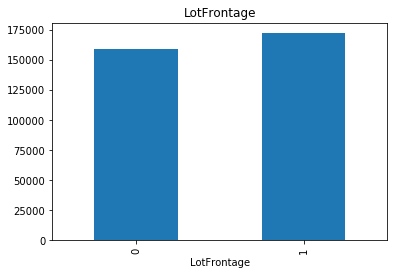

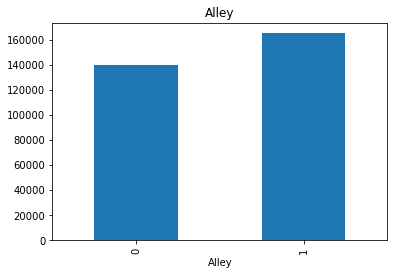

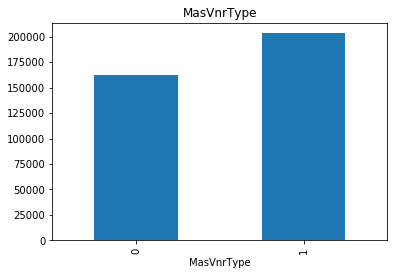

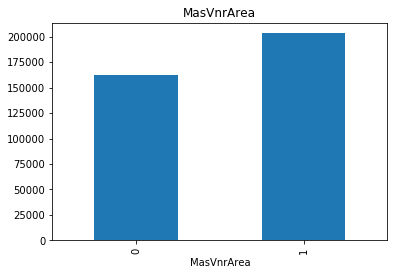

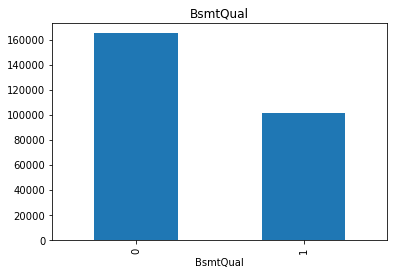

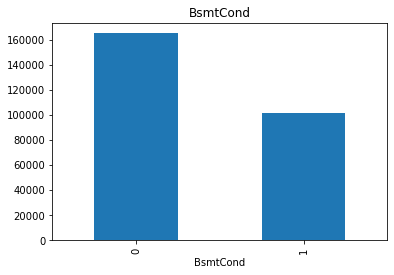

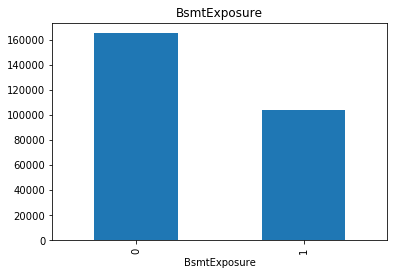

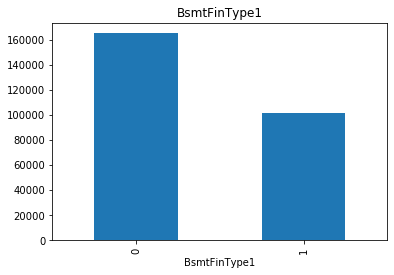

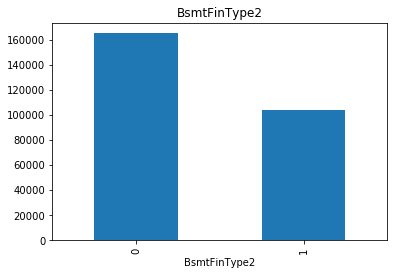

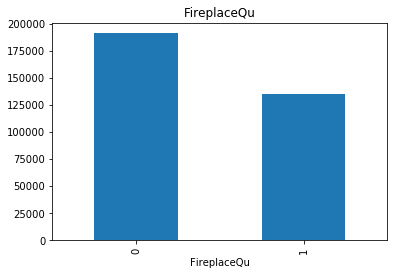

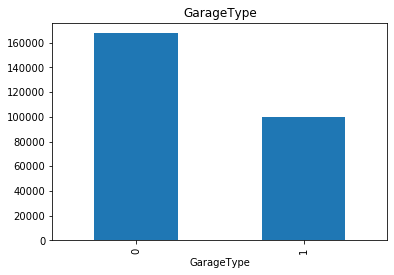

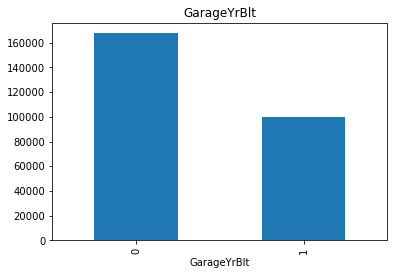

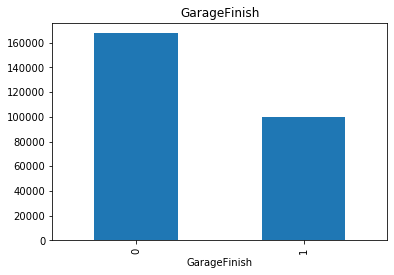

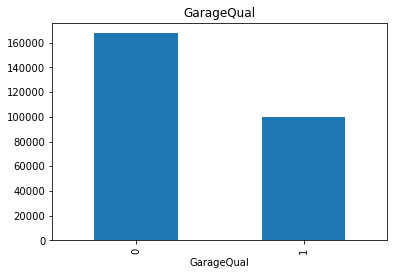

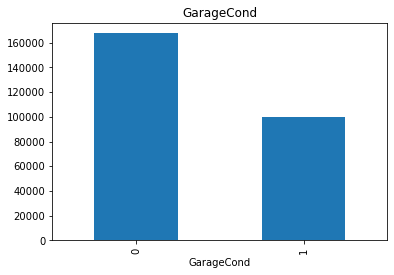

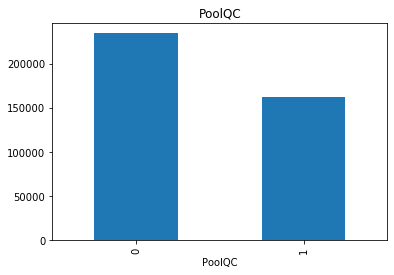

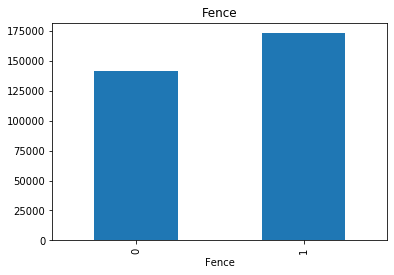

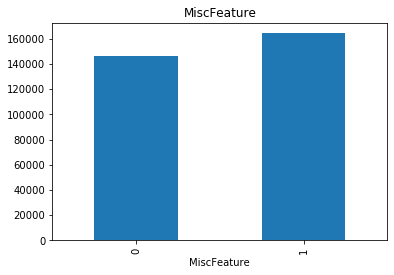

In [6]:
data=dataset.copy()
for feature in nan_feature:
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Numerical variables


In [7]:
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Total numerical_features = ', len(numerical_feature))
dataset[numerical_feature].head()

Total numerical_features =  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
year_feature=[feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature ]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

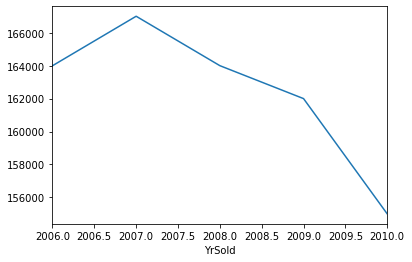

In [10]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.show()

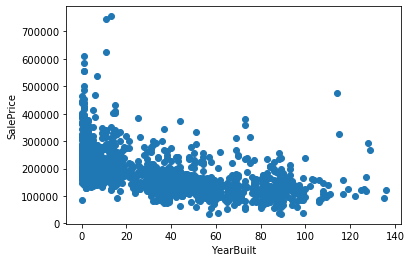

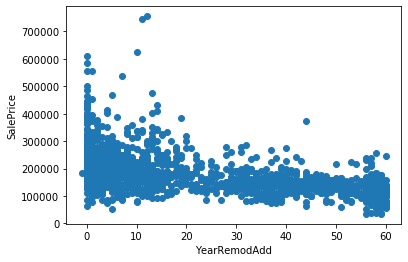

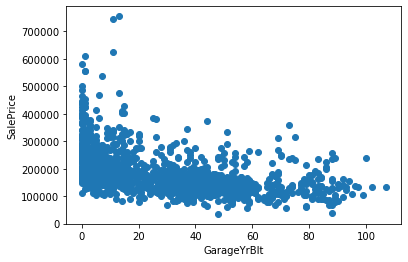

In [11]:
for feature in year_feature:
    if feature != 'YrSold':
        data=dataset.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [12]:
Discrete_feature = [feature for feature in numerical_feature if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete feature count : {}".format(len(Discrete_feature)))
Discrete_feature

Discrete feature count : 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
dataset[Discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


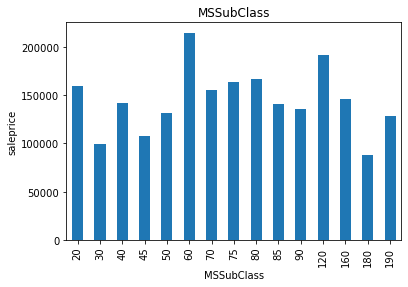

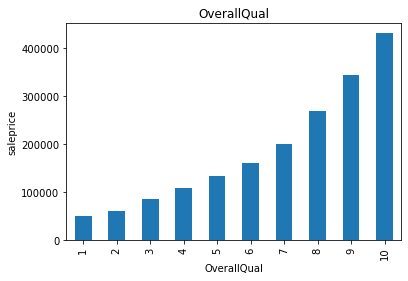

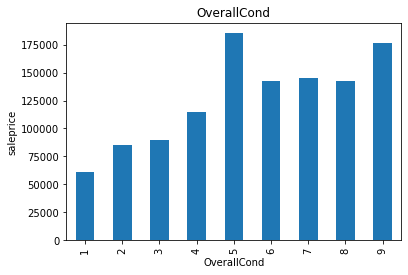

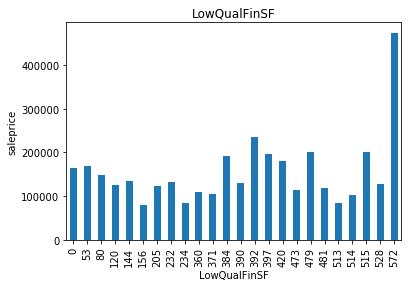

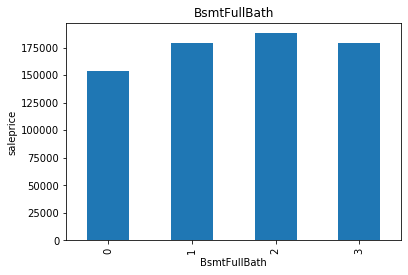

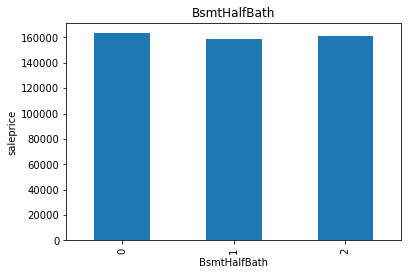

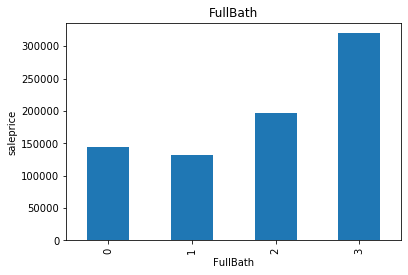

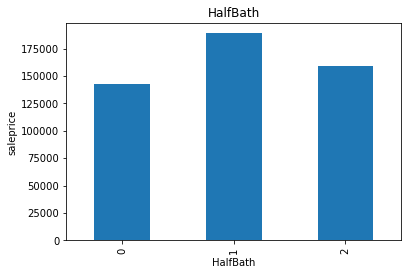

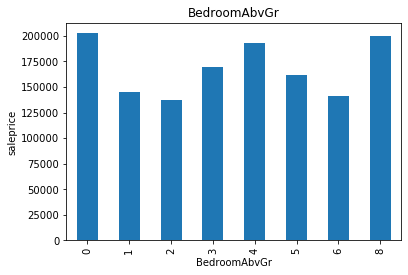

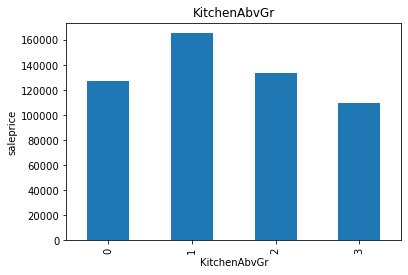

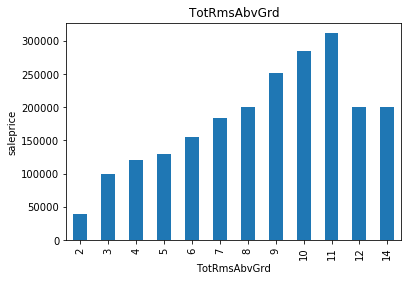

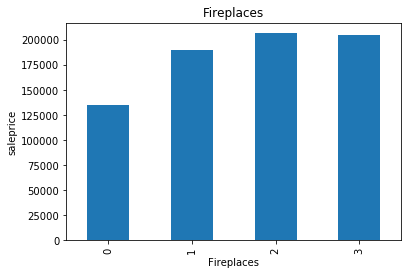

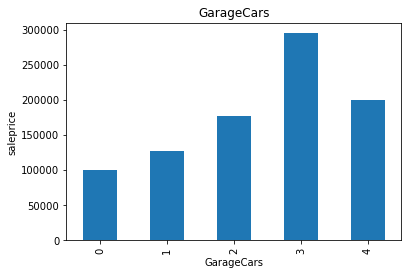

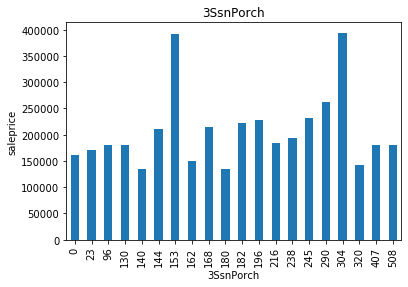

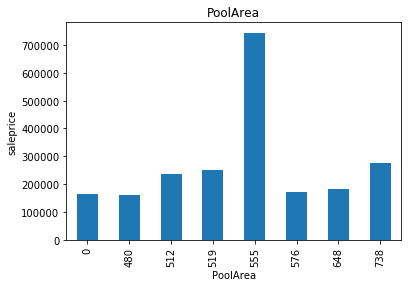

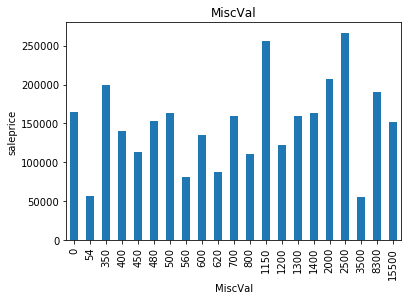

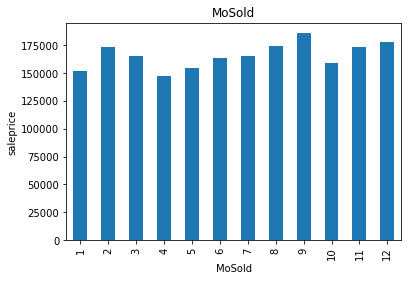

In [14]:
for feature in Discrete_feature:
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('saleprice')
    plt.title(feature)
    plt.show()

In [15]:
cont_feature=[feature for feature in numerical_feature if feature not in Discrete_feature+year_feature+['Id']]
print("continuous feature count : {}".format(len(cont_feature)))
cont_feature

continuous feature count : 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

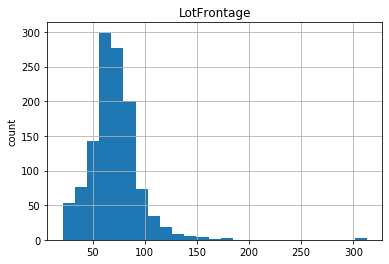

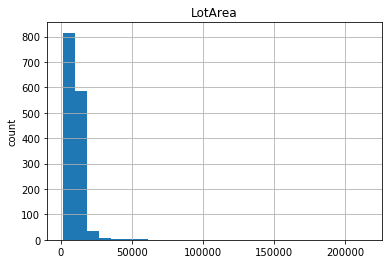

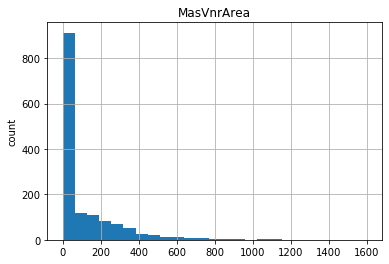

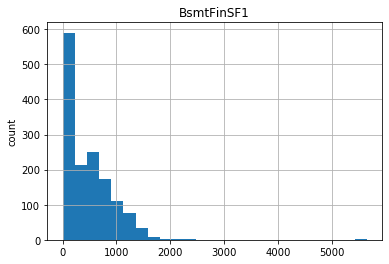

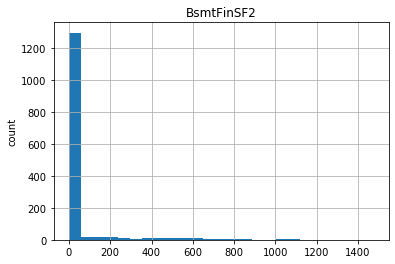

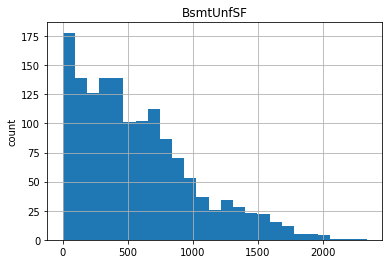

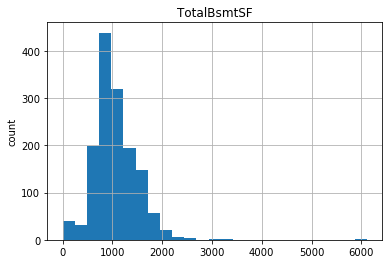

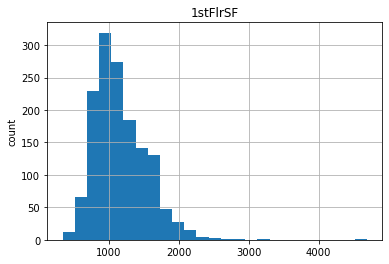

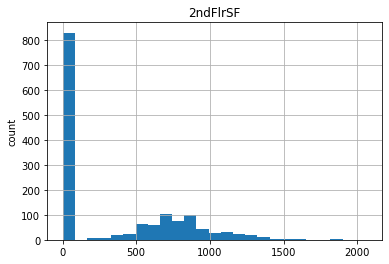

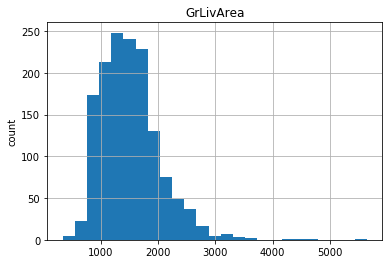

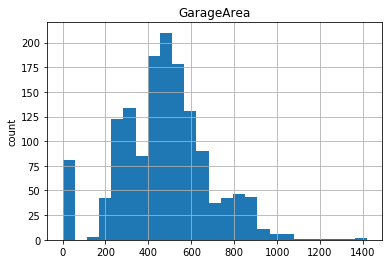

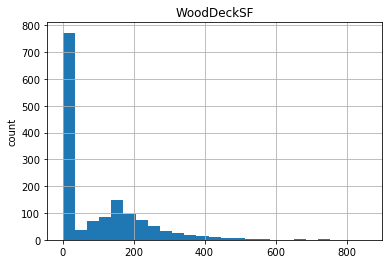

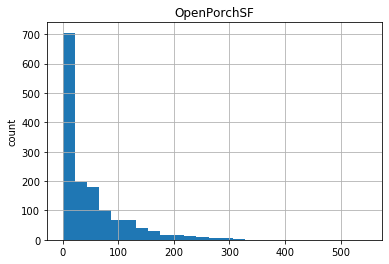

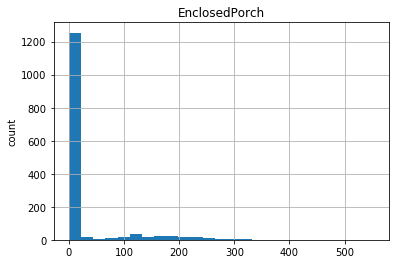

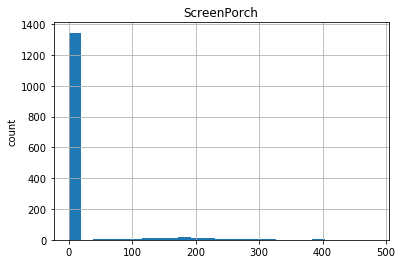

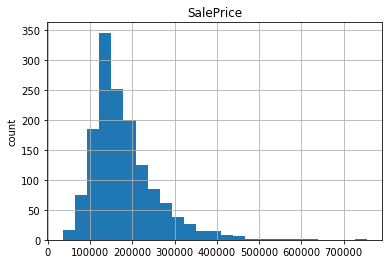

In [16]:
for feature in cont_feature:
    dataset[feature].hist(bins=25)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

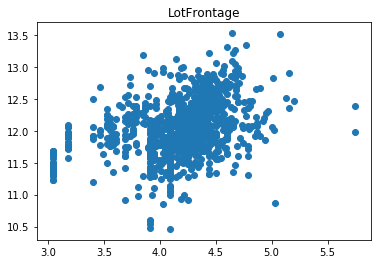

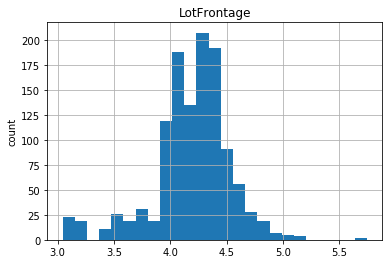

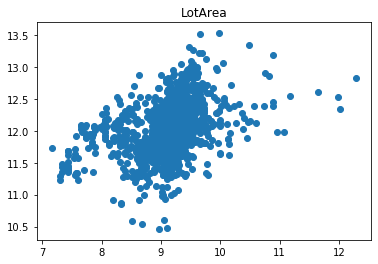

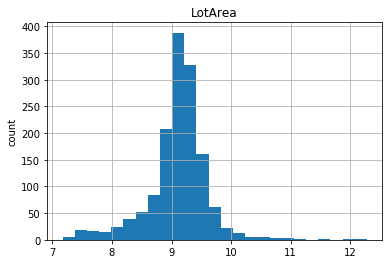

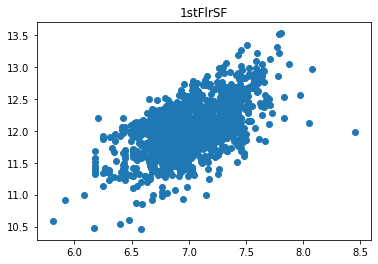

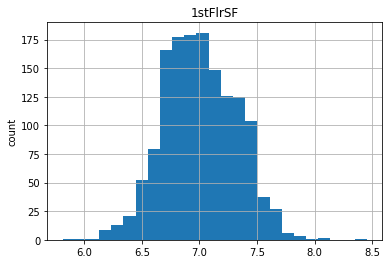

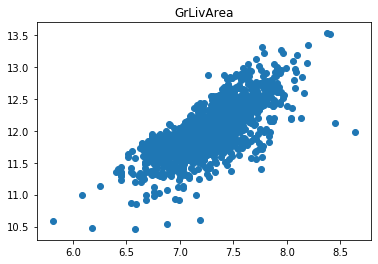

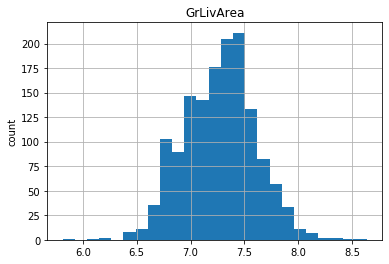

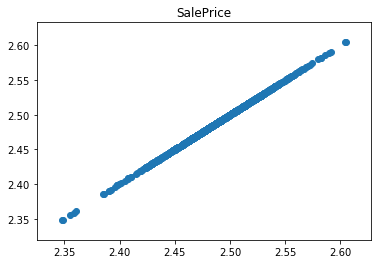

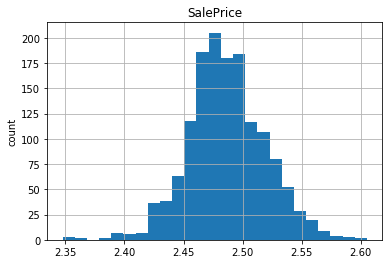

In [17]:
for feature in cont_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()
        
        data[feature].hist(bins=25)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

# Outliers


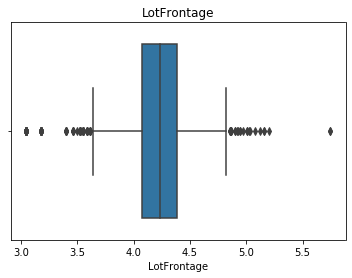

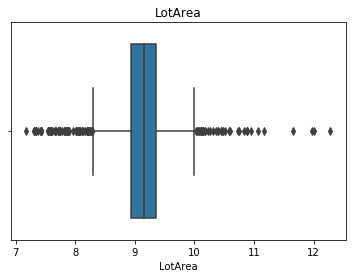

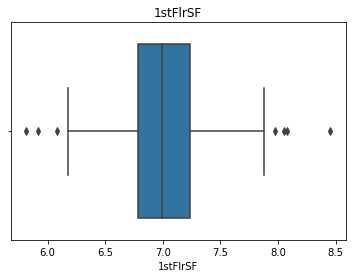

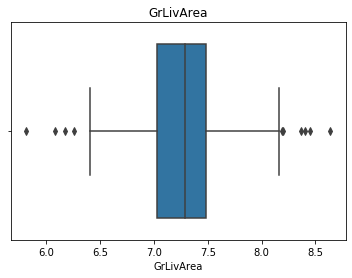

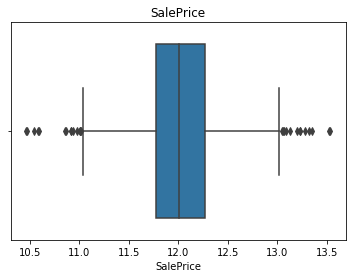

In [18]:
for feature in cont_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        sns.boxplot(x=data[feature])
        plt.title(feature)
        plt.show()
        

# categorical features

In [19]:
catagorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
print('total number of categorical features is {}'.format(len(catagorical_feature)))
catagorical_feature

total number of categorical features is 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
for feature in catagorical_feature:
    print('total number of catagories in {} features is {}'.format(feature,len(dataset[feature].unique())))   

total number of catagories in MSZoning features is 5
total number of catagories in Street features is 2
total number of catagories in Alley features is 3
total number of catagories in LotShape features is 4
total number of catagories in LandContour features is 4
total number of catagories in Utilities features is 2
total number of catagories in LotConfig features is 5
total number of catagories in LandSlope features is 3
total number of catagories in Neighborhood features is 25
total number of catagories in Condition1 features is 9
total number of catagories in Condition2 features is 8
total number of catagories in BldgType features is 5
total number of catagories in HouseStyle features is 8
total number of catagories in RoofStyle features is 6
total number of catagories in RoofMatl features is 8
total number of catagories in Exterior1st features is 15
total number of catagories in Exterior2nd features is 16
total number of catagories in MasVnrType features is 5
total number of catagor

In [21]:
for feature in cont_feature:
    data=dataset.copy()
    if 0 not in data[feature].unique():
        print(data[feature].name)

LotFrontage
LotArea
1stFlrSF
GrLivArea
SalePrice
